## Exercise 3 - **Car travel in 2 dimensions**

The goal of this exercise is to familiarise with:
- code structure `# Physics, # Numerics, # Time loop, # Visualisation`
- array initialisation
- `for` loop
- update rule
- `if` condition
- 2 spatial dimensions

Based on the experience you acquired solving the [Exercise 2](#exercise_2_-_car_travel) we can now consider a car moving within a 2-dimensional space. The car still travels at speed $V=113$ km/h, but now in North-East or North-West direction. The car's displacement in the West-East directions ($x$-axis) is limited to $L=200$ km. The speed in the North direction is constant remains constant.

Starting from the 1D code done in [Exercise 2](#exercise_2_-_car_travel), work towards adding the second spatial dimension. Now, the car's position $(x,y)$ as function of time $t$ has two components.

> 💡 hint:
> - Split velocity magnitude $V$ into $x$ and $y$ component
> - Use `sind()` or `cosd()` functions if passing the angle in _deg_ instead of _rad_
> - Use two vectors or an array to store the car's coordinates
> - Define the y-axis extend in the plot `ylims=(0, ttot*Vy)`

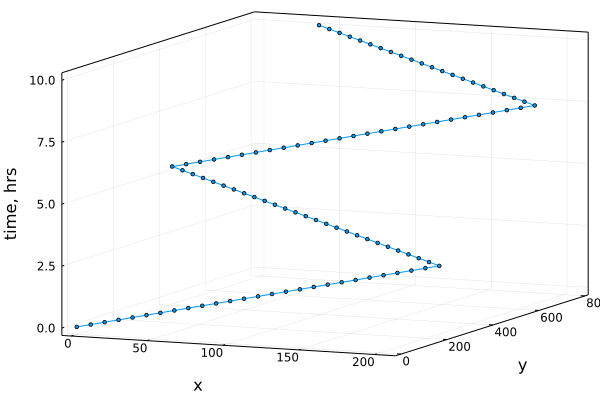

In [9]:
using Plots

@views function car_travel_2D(dt)
    # Physical parameters
    V    = 113/√2*[1.,1]  # initial speed, km/h
    Lx    = 200  # length of segment, km
    ttot = 10    # total time, h
    # Numerical parameters
    # dt    = 0.1            # time step, h
    nt    = Int(cld(ttot, dt))  # number of time steps
    # Array initialisation
    T     = range(0,ttot,nt)
    X     = zeros(2,nt)
    # Time loop
    for it = 2:nt
        # T[it] = T[it-1] + dt
        X[:,it] = X[:,it-1] .+ dt.*V  # move the car, first variable should change the fastest for julia arrays
        if X[1,it] > Lx || X[1,it] < 0
                V[1] = -V[1]
        end
    end
    # Visualisation
    x = X[1,:]
    y = X[2,:]
    return plot3d(x,y,T,marker=2, markersize=5,
                    zlabel="time, hrs", ylabel="y",xlabel="x",
                    framestyle=:box, legend=:none)
end


### Question 1

Visualise graphically the trajectory of the travelling car for a simulation with time step parameter defined as `dt = 0.1`.

In [ ]:
p1 = car_travel_2D(0.1)